# Retrieval Augmented Generation (RAG) Challenge
📅 **Date:** February 5, 2025  
📅 **Submission Date:** February 7, 2025  
👩‍💻 **Authors:** Ginosca Alejandro Dávila & Natanael Santiago Morales  

## Introduction
Retrieval Augmented Generation (RAG) is a novel approach that combines the strengths of retrieval-based and generation-based models to provide accurate and contextually relevant responses. By leveraging a vector database to retrieve relevant documents and a large language model (LLM) to generate responses, RAG can significantly enhance the capabilities of applications in various domains such as customer support, knowledge management, and content creation.

## Project Overview

This project is structured to provide hands-on experience in implementing a RAG system. Students will work through stages from dataset selection to connection to external artefacts (VectorDB, APIs), gaining a comprehensive understanding of RAG’s components and their integration.

## Data Selection
We chose the Financial Laws Collection, a collection of 11 documents on Financial legislation of the European Union,provided [here in the repository](./data/). We originally intended to choose the other dataset in the repository, the *Puerto Rico News Articles*, but upon inspecting the text files, we opted not to choose it due to the lack of structure and unreadability of the text files.

Each document in the dataset varied in length, covering legal provisions, case law, or financial regulations. 

## Code and guide-through

### Importing Libraries
We begin importing and installing the necessary libraries for the project. We mainly used `langchain`, a software development framework designed to simplify the creation of applications that use large language models (LLMs). From `langchain`, we used
- `langchain_openai`: LangChain integrations for OpenAI through their `openai` SDK. Used in this project for the `OpenAIEmbeddings`.
- `langchain_huggingface`: integrates seamlessly with LangChain, providing an efficient and effective way to utilize Hugging Face models within the LangChain ecosystem. Used in this project for the `HuggingFaceEmbeddings`.
- `lancghain_chroma`: Chroma is an AI-native open-source vector database. 
- `langchain_community`: A collection of community-contributed LangChain plugins. Used in this project for loading and splitting the PDFs into pages.
- `langchain_text_splitters`: A collection of LangChain plugins for splitting text. Used in this project for splitting pages into smaller chunks.

We also used `enchant` for spellchecking and `openai` for the OpenAI API. In this same codeblock, we loaded the openai API key and initialized the openai client.

In [8]:
# Import necessary libraries
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import CharacterTextSplitter

import os
import enchant
import re

from dotenv import load_dotenv
from IPython.display import Markdown


# Set your OpenAI API key
load_dotenv()
API_KEY = os.getenv("OPENAI_API_KEY")
RUN_EVERYTHING = False

from openai import OpenAI

client = OpenAI(
  api_key= API_KEY
)

Before beginning, we will run this small codeblock to make sure you don't run everything, since there is no need to load the dataset, split the text, and embed the text, and make a database again. We can simply load the database and query it.

In [64]:
# Tell the user that we are not going to run every cell, since it would be unnecesary, but still ask for their input just in case they want to run it all
print("Running all cells would be unnecessary (like building a database), so we are not going to do it. However, if you want to run all the cells, please type \"y\".")
run_everything = input("Do you want to run all the cells? (y/n): ")

# make sure run_everything is lowercase and only get first letter
run_everything = run_everything.lower()[0] if (run_everything != '') else 'n'

RUN_EVERYTHING = run_everything == 'y'

Running all cells would be unnecessary (like building a database), so we are not going to do it. However, if you want to run all the cells, please type "y".


### Loading the Dataset and Splitting the Text into Chunks
After unzipping the dataset (I did it manually, yet we could've also done it here) we initialized an empty list that will hold all the chunks from the pdfs and also created a text splitter. We then looped through the pdfs, split them into pages, and then split each page into chunks. Each chunk was then added to the list of chunks.

There were several options for the text splitter. We were considering `CharacterTextSplitter` and `RecursiveCharacterTextSplitter`. In the end, we chose `CharacterTextSplitter` because the other option cut the text into smaller chunks, removing the context of the text. The text overlapped with a previous chunk by 200 characters.

In [2]:
if RUN_EVERYTHING:
    print("Running all cells")
# Directory containing the PDF files
    document_dir = "./data/Finance_laws/EurLex_v1"

    # Initialize an empty list to hold all documents
    all_docs = []

    # Create a text splitter
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

    # Loop through all PDF files in the directory
    for filename in os.listdir(document_dir):
        # Checking that we only take pdf files
        if filename.endswith(".pdf"):
            # after getting the file name, we add it to the path
            file_path = os.path.join(document_dir, filename)
            # Load the document and split it into pages
            pages = PyPDFLoader(file_path).load_and_split()
            # Split the text content of each page into smaller chunks
            docs = text_splitter.split_documents(pages)
            # Add the smaller chunks to the all_docs list
            all_docs.extend(docs)

    print(f"Number of documents: {len(all_docs)}")

Number of documents: 1561


After loading all the chunks in `all_docs`, here we show a sample element of the list, which is an object created by the text splitter, containing the metadata of the document and the content of the page.

```python
[
    Document(
        metadata={
            'source': './data/Finance_laws/EurLex_v1/AMLD_EURLEX.pdf', # Path to the document
            'page': 0,                                                  # Page number (from the document)
            'page_label': '1'                                           # Page number, assigned by the text splitter.
            },
        page_content=                                                   # Text from the chunk
            "Chunk contents"
    )
]
```

Now, we see the first element of the list, which is organized as we just mentioned.

In [3]:
if RUN_EVERYTHING:
    all_docs[0]

Document(metadata={'source': './data/Finance_laws/EurLex_v1\\AMLD_EURLEX.pdf', 'page': 0, 'page_label': '1'}, page_content="DIRECTIVES \nDIRECTIVE (EU) 2015/849 OF THE EUR OPEAN P ARLIAMENT AND OF THE COUNC IL \nof 20 May 2015 \non the prev ention of the use of the f inancial sys tem for the pur poses of money launder ing or \nter ror is t f inancing, amending Regulation (EU) No 648/2012 of the European Parliament and of the \nCouncil, and repealing Directiv e 2005/60/EC of the European Parliament and of the Council and \nCommission Directiv e 2006/70/EC \n(T ext with EEA relevance) \nTHE EUR OPEAN P ARLIAMENT AND THE COUNCIL OF THE EUR OPEAN UNION, \nHa ving regar d to the T reaty on the Functioning of the European Union, and in par ticular Ar ticle 114 thereof, \nHa ving regar d to the proposal from the European Commission, \nAf ter transmission of the draf t legislative act to the national parliaments, \nHa ving regar d to the opinion of the European Central Bank (\n1\n), \nHa ving 

Next we printed the content of the first chunk to see how the text was split and if it contained some errors. We also viewed it as markdown so it would be easier to focus on the text and not on the format. 

From the printing, we can see that the text has many line breaks and some words are split apart. We will need to clean the text before using it in the RAG system.

In [4]:
if RUN_EVERYTHING:
    print(all_docs[0].page_content)
    display(Markdown(all_docs[0].page_content))

DIRECTIVES 
DIRECTIVE (EU) 2015/849 OF THE EUR OPEAN P ARLIAMENT AND OF THE COUNC IL 
of 20 May 2015 
on the prev ention of the use of the f inancial sys tem for the pur poses of money launder ing or 
ter ror is t f inancing, amending Regulation (EU) No 648/2012 of the European Parliament and of the 
Council, and repealing Directiv e 2005/60/EC of the European Parliament and of the Council and 
Commission Directiv e 2006/70/EC 
(T ext with EEA relevance) 
THE EUR OPEAN P ARLIAMENT AND THE COUNCIL OF THE EUR OPEAN UNION, 
Ha ving regar d to the T reaty on the Functioning of the European Union, and in par ticular Ar ticle 114 thereof, 
Ha ving regar d to the proposal from the European Commission, 
Af ter transmission of the draf t legislative act to the national parliaments, 
Ha ving regar d to the opinion of the European Central Bank (
1
), 
Ha ving regar d to the opinion of the European Economic and Social Committ ee (
2
), 
A cting in accordance with the ordinar y legislative procedur

DIRECTIVES 
DIRECTIVE (EU) 2015/849 OF THE EUR OPEAN P ARLIAMENT AND OF THE COUNC IL 
of 20 May 2015 
on the prev ention of the use of the f inancial sys tem for the pur poses of money launder ing or 
ter ror is t f inancing, amending Regulation (EU) No 648/2012 of the European Parliament and of the 
Council, and repealing Directiv e 2005/60/EC of the European Parliament and of the Council and 
Commission Directiv e 2006/70/EC 
(T ext with EEA relevance) 
THE EUR OPEAN P ARLIAMENT AND THE COUNCIL OF THE EUR OPEAN UNION, 
Ha ving regar d to the T reaty on the Functioning of the European Union, and in par ticular Ar ticle 114 thereof, 
Ha ving regar d to the proposal from the European Commission, 
Af ter transmission of the draf t legislative act to the national parliaments, 
Ha ving regar d to the opinion of the European Central Bank (
1
), 
Ha ving regar d to the opinion of the European Economic and Social Committ ee (
2
), 
A cting in accordance with the ordinar y legislative procedure (
3
), 
Whereas: 
(1)  Flo ws of illicit mone y can damage the integrit y , stability and reputation of the financial sector , and threaten the 
internal market of the U nion as well as intern ational development. Mone y launder ing, terror ism financing and 
org anised cr ime remain significant problems which should be addressed at U nion level. In addition to fur ther 
developing the cr iminal la w approach at Union level, target ed and propor tionat e prevention of the use of the 
financia l system f or the pur poses of money launder ing and terr or ist financing is indispensable and can produce 
compl ementar y results. 
(2)  The soundness, integr ity and stability of credit institutions and fi nancial institutions, and confidence in the 
financia l system as a whole could be ser iously jeopardised by the eff or ts of cr iminals and their associates to 
disguise the or igin of cr iminal proceeds or to c hannel lawful or illicit money f or terr or ist pur poses. In order to 
f acilitate their cr iminal activities, mone y launderers and financer s of te r ror ism could tr y to take advantage of the 
freedom of capital mo vements and the freedom to supply fi nancial ser vices whic h the U nion's integrat ed fi nancial 
area entails. Theref ore, cer tain coordinating measures are necessar y at U nion level. A t the same time, the 
objectives of prot ecting society from cr ime and protectin g the stability and integrit y of the Union's financia l 
system should be balanced ag ainst the need to create a regulatory en vironment that allo ws compan ies to gro w 
their businesses without incur r ing dispropor tionate compl iance costs. 
(3)  This Directive is the f our th directive to address the threat of mone y launder ing. Council Directive 91/308/EEC (
4
) 
defined mone y launder ing in term s of dr ugs off ences and imposed obligations solely on the financial sector . 
5.6.2015 L 141/73 Official Jour nal of the European Union EN     
(
1
) OJ C 166, 12.6.2013, p. 2. 
(
2
) OJ C 271, 19.9.2013, p. 31. 
(
3
) P osition of the European P arliament of 11 March 2014 (not yet published in the Offi cial Jour nal) and position of the Council at first 
reading of 20 Apr il 2015 (not yet published in the Offi cial Jour nal). P osition of the European P arliament of 20 Ma y 2015 (not yet 
published in the Official Jour nal). 
(
4
) Council Directive 91/308/EEC of 10 June 1991 on prevention of the use of the f inancial syst em f or the pur pose of money launder ing 
(OJ L 166, 28.6.1991, p. 77).

### Cleaning the Text

For cleaning the text, we built a function. Firstly, we import a dictionary to check for spelling errors, but more importantly for merging the words.

The `correct_split_words()` function takes a sentence (or more correctly, a `chunk`) and 
- firstly removes all the line brakes, substituting them by spaces
- then, we tokenize the chunks into words. Some chunks will be a single letter or a split word, others will be full words, and other may be punctuation marks (such as periods and parentheses)
- we initialize a list to hold the corrected chunk and have a counter to keep track of the current word
- Then we loop through each token (or "word").
    - We begin by merging two tokens and removing any symbol there may be
    - if the merged token was a symbol (a parentheses, for example), we add it to the corrected chunk, since there is nothing to correct
    - then we check if the merged tokens are a word in the dictionary. If it is, we add the merged word to the corrected chunk and we pass to the next token (we actually skip a token: the second part of the merged word). Since most words were split into two, this fixes most of the split words.
    - If the merged tokens do not make a word that exists in the dictionary, we add the first token to the corrected chunk and pass to the next token.
    - Then we add the last token to the corrected chunk if it was not merged. 

In short, we are merging two tokens if they make a word (that exists in the dictionary)

After obtaining the `corrected_chunk`, we apply a series of regex transformations to fix punctuation, formatting, and spacing issues that often arise when splitting and merging tokens:

- `re.sub(r'([,.")(])(?=\D)', r'\1 ', corrected_sentence)` adds a space after punctuation marks such as commas, periods, and parentheses, but only when they are followed by a non-digit character.
- `re.sub(r'\s+([,.)])', r'\1', corrected_sentence)` removes any space before punctuation marks like commas and periods, ensuring correct punctuation placement.
- `re.sub(r'\(\s+', '(', corrected_sentence)` removes any space after opening brackets.
- `re.sub(r'\s+', ' ', corrected_sentence).strip()` removes any extra spaces between words and trims any leading or trailing spaces.
- `re.sub(r'(\d)([A-Za-z])', r'\1 \2', corrected_sentence)` ensures there is a space between digits and letters in cases where numbers and text were mistakenly joined.
- `re.sub(r'([A-Za-z]{2,})(\d+)', r'\1 \2', corrected_sentence)` adds a space between letters and digits when letters precede numbers, handling issues such as merged alphanumeric tokens.
- `re.sub(r'(\w)(\()(?!s\))', r'\1 \2', corrected_sentence)` adds a space between a word and an opening bracket unless it's an exception like "s)" (for possessive forms like "it's").

These transformations help refine the corrected chunk, ensuring proper spacing, punctuation, and formatting across the cleaned text.


In [5]:
import enchant
import re

# Load the English dictionary
d = enchant.Dict("en_US")

# Function to correct split words
def correct_split_words(sentence):
    # Replace newlines with spaces
    sentence = sentence.replace("\n", " ")
    
    words = sentence.split()  # Tokenize the sentence
    i = 0
    corrected_sentence = []
    
    while i < len(words) - 1:
        merged_word = words[i] + words[i+1]  # Merge adjacent words
        stripped_merged_word = re.sub(r'[^a-zA-Z]', '', merged_word) #remove symbols from merged word using regex
        
        # check if stripped merged word is empty
        if stripped_merged_word == '':
            corrected_sentence.append(words[i])
            i += 1
        elif d.check(stripped_merged_word):  # Check if merged word is in the dictionary
            corrected_sentence.append(merged_word)  # Add corrected word
            i += 2  # Skip the next word since it's already merged
        else:
            corrected_sentence.append(words[i])  # Add unmerged word
            i += 1  # Move to the next word

    # Add the last word if it wasn't merged
    if i < len(words):
        corrected_sentence.append(words[i])

    corrected_sentence = " ".join(corrected_sentence)

    corrected_sentence = re.sub(r'([,.")(])(?=\D)', r'\1 ', corrected_sentence) # Add space after punctuation
    corrected_sentence = re.sub(r'\s+([,.)])', r'\1', corrected_sentence) # Remove space before punctuation
    corrected_sentence = re.sub(r'\(\s+', '(', corrected_sentence) # Remove space after opening bracket
    corrected_sentence = re.sub(r'\s+', ' ', corrected_sentence).strip() # Remove extra spaces
    corrected_sentence = re.sub(r'(\d)([A-Za-z])', r'\1 \2', corrected_sentence) # Add space between digits and letters
    corrected_sentence = re.sub(r'([A-Za-z]{2,})(\d+)', r'\1 \2', corrected_sentence) # Add space between letters and digits
    corrected_sentence = re.sub(r'(\w)(\()(?!s\))', r'\1 \2', corrected_sentence) # Add space between word and opening bracket
    
    return corrected_sentence

Now, we pass each chunk through the `correct_split_words()` function. We then print the first element of the cleaned list to see how the text was cleaned.

In [6]:
if RUN_EVERYTHING:
    # Apply the function to all documents in `all_docs[]`
    for doc in all_docs:
        doc.page_content = correct_split_words(doc.page_content)

    print(all_docs[0].page_content)

DIRECTIVES DIRECTIVE (EU)2015/849 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL of 20 May 2015 on the prevention of the use of the financial system for the purposes of money laundering or terror is t financing, amending Regulation (EU) No 648/2012 of the European Parliament and of the Council, and repealing Directive 2005/60/EC of the European Parliament and of the Council and Commission Directive 2006/70/EC (Text with EEA relevance) THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION, Having regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof, Having regard to the proposal from the European Commission, After transmission of the draft legislative act to the national parliaments, Having regard to the opinion of the European Central Bank (1), Ha ving regard to the opinion of the European Economic and Social Committee (2), A cting in accordance with the ordinary legislative procedure (3), Whereas: (1) Flo ws of illicit money can d

We print the same chunk as before. Now we see that there are no line breaks and the text is more readable, since we attempted to fix some formatting issues as well as merge some broken words. 

In [7]:
if RUN_EVERYTHING:
    print(all_docs[0].page_content)
    display(Markdown(all_docs[0].page_content))

DIRECTIVES DIRECTIVE (EU)2015/849 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL of 20 May 2015 on the prevention of the use of the financial system for the purposes of money laundering or terror is t financing, amending Regulation (EU) No 648/2012 of the European Parliament and of the Council, and repealing Directive 2005/60/EC of the European Parliament and of the Council and Commission Directive 2006/70/EC (Text with EEA relevance) THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION, Having regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof, Having regard to the proposal from the European Commission, After transmission of the draft legislative act to the national parliaments, Having regard to the opinion of the European Central Bank (1), Ha ving regard to the opinion of the European Economic and Social Committee (2), A cting in accordance with the ordinary legislative procedure (3), Whereas: (1) Flo ws of illicit money can d

DIRECTIVES DIRECTIVE (EU)2015/849 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL of 20 May 2015 on the prevention of the use of the financial system for the purposes of money laundering or terror is t financing, amending Regulation (EU) No 648/2012 of the European Parliament and of the Council, and repealing Directive 2005/60/EC of the European Parliament and of the Council and Commission Directive 2006/70/EC (Text with EEA relevance) THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION, Having regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof, Having regard to the proposal from the European Commission, After transmission of the draft legislative act to the national parliaments, Having regard to the opinion of the European Central Bank (1), Ha ving regard to the opinion of the European Economic and Social Committee (2), A cting in accordance with the ordinary legislative procedure (3), Whereas: (1) Flo ws of illicit money can damage the integrity, stability and reputation of the financial sector, and threaten the internal market of the Union as well as international development. Money laundering, terrorism financing and org anised crime remain significant problems which should be addressed at Union level. In addition to further developing the criminal law approach at Union level, targeted and propor tionat e prevention of the use of the financial system for the purposes of money laundering and terror ist financing is indispensable and can produce compl ementar y results. (2) The soundness, integrity and stability of credit institutions and financial institutions, and confidence in the financial system as a whole could be seriously jeopardised by the eff orts of criminals and their associates to disguise the origin of criminal proceeds or to channel lawful or illicit money for terror ist purposes. In order to facilitate their criminal activities, money launderers and financer s of ter ror ism could try to take advantage of the freedom of capital movements and the freedom to supply financial services which the Union's integrated financial area entails. Therefore, certain coordinating measures are necessary at Union level. At the same time, the objectives of protecting society from crime and protecting the stability and integrity of the Union's financial system should be balanced against the need to create a regulatory environment that allows companies to grow their businesses without incur ring disproportionate compliance costs. (3) This Directive is the four th directive to address the threat of money laundering. Council Directive 91/308/EEC (4) defined money laundering in terms of drugs off ences and imposed obligations solely on the financial sector. 5.6.2015 L 141/73 Official Journal of the European Union EN (1) OJ C166, 12.6.2013, p. 2. (2) OJ C271, 19.9.2013, p. 31. (3) P osition of the European Parliament of 11 March 2014 (not yet published in the Official Journal) and position of the Council at first reading of 20 April 2015 (not yet published in the Official Journal). Position of the European Parliament of 20 May 2015 (not yet published in the Official Journal). (4) Council Directive 91/308/EEC of 10 June 1991 on prevention of the use of the financial system for the purpose of money laundering (OJ L166, 28.6.1991, p. 77).

### Embeddings

Now that we have the cleaned text, we can generate embeddings for each chunk. We used two embeddings: One from **OpenAI** (`text-embedding-3-large`) and one from **Hugging Face** (`all-MiniLM-L6-v2`). We used the embeddings to find the most similar chunks to a given query.

Here we are just initializing the embeddings. We will use them later to find the most similar chunks to a query.

In [9]:
if RUN_EVERYTHING:
    # Create the embeddings function

    openai_embeddings = OpenAIEmbeddings(model="text-embedding-3-large", api_key=API_KEY)
    print("Initialized OpenAI embeddings.")

    sentence_transformer_embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
    print("Initialized SentenceTransformer embeddings.")

Initialized OpenAI embeddings.

Initialized SentenceTransformer embeddings.


### Storing the Chunks in the Vector Database

After initializing the embeddings, we created a vector database using `Chroma` and stored the embeddings of each chunk in the database. We created two databases: one for the OpenAI embeddings and one for the Hugging Face embeddings.

In [10]:
if RUN_EVERYTHING:
    # Load all documents into Chroma
    db = Chroma.from_documents(all_docs, sentence_transformer_embeddings, persist_directory="./chroma_db_clean_huggingface")
    print('All documents loaded and embedded.(huggingface)')

    db_openai = Chroma.from_documents(all_docs, openai_embeddings, persist_directory="./chroma_db_clean_openai")
    print('All documents loaded and embedded.(openai)')

All documents loaded and embedded.(huggingface)
All documents loaded and embedded.(openai)


### Fetching Similar Chunks

First, lets load the Chroma databases. We will use them to query the most similar chunks to a given query.

In [ ]:
if not RUN_EVERYTHING:
    print("Loading the databases")

    persist_directory_huggingface = "./chroma_db_clean_huggingface"
    db = Chroma(persist_directory=persist_directory_huggingface, embedding_function=sentence_transformer_embeddings)

    persist_directory_openai = "./chroma_db_clean_openai"
    db_openai = Chroma(persist_directory=persist_directory_openai, embedding_function=openai_embeddings)

Now that we have the chunks stored in the vector database, we can fetch the most similar chunks to a given query. Here we are fetching the most similar chunks to a query using the **Hugging Face** embeddings. We fetch the 5 most similar chunks to the query, but only print the top 3 ones

In [11]:
# Example query
user_question = "What are the key points of financial legislation in Europe?"
docs = db.similarity_search(user_question, k=5)

# Print results
for doc in docs[0:3]:
    # print(doc.page_content, '\n')
    display(Markdown(doc.page_content))
    print("*"*80, '\n')

I (Legislative acts) REGULATIONS REGULATION (EU) No 575/2013 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL of 26 June 2013 on prudential requirements for credit institutions and investment firms and amending Regulation (EU) No 648/2012 (Text with EEA relevance) THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION, Having regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof, Having regard to the proposal from the European Commission, After transmission of the draft legislative act to the national parliaments, Having regard to the opinion of the European Central Bank (1), Having regard to the opinion of the European Economic and Social Committee (2), Acting in accordance with the ordinary legislative procedure, Whereas:(1) The G-20 Declaration of 2 April 2009 on Strengthening of the Financial System called for internationally consistent efforts that are aimed at strengthening trans­ parency, accountability and regulation by improving the quantity and quality of capital in the banking system once the economic recovery is assured. That declaration also called for introduction of a supplementary non-risk based measure to contain the build-up of leverage in the banking system, and the development of a framework for stronger liquidity buffers. In response to the mandate given by the G-20, in September 2009 the Group of Central Bank Governors and Heads of Supervision (GHOS), agreed on a number of measures to strengthen the regulation of the banking sector. Those measures were endorsed by the G-20 leaders at their Pittsburgh Summit of 24-25 September 2009 and were set out in detail in December 2009. In July and September 2010, GHOS issued two further announcements on design and calibration of those new measures, and in December 2010, the Basel Committee on Banking Supervision (BCBS) published the final measures, that are referred to as the Basel III framework. (2) The High Level Group on Financial Supervision in the EU chaired by Jacques de Larosière (the " de Larosière group") invited the Union to develop a more harmonised set of financial regulations. In the context of the future European supervisory architecture, the European Council of 18 and 19 June 2009 also stressed the need to establish a' European Single Rule Book' applicable to all credit institutions and investment firms in the internal market. (3) As stated in the de Larosière group's report of 25 February 2009 (the" de Larosière report"), " a Member State should be able to adopt more stringent national regulatory measures considered to be domes­ tically appropriate for safeguarding financial stability as long as the principles of the internal market and agreed minimum core standards are respected". (4) Directive 2006/48/EC of the European Parliament and of the Council of 14 June 2006 relating to the taking up and pursuit of the business of credit institutions (3) and Directive 2006/49/EC of the European Parliament and of EN 27.6.2013 Official Journal of the European Union L176/1 (1) OJ C105, 11.4.2012, p. 1. (2) OJ C68, 6.3.2012, p. 39. (3) OJ L177, 30.6.2006, p. 1.

******************************************************************************** 



(121) In order to take account of market developments and experience in the application of this Regulation, the Commission should be required to submit reports to the European Parliament and to the Council, together with legislative proposals, where appropriate, on the possible effect of capital requirements on the economic cycle of minimum, own funds requirements for exposures in the form of covered bonds, large exposures, liquidity requirements, leverage, exposures to transferred credit risk, counterparty credit risk and the original exposure method, retail exposures, on the definition of eligible capital, and the level of application of this Regu ­ lation. (122) The primary purpose of the legal framework for credit institutions should be to ensure the operation of vital services to the real economy while limiting the risk of moral hazard. The structural separation of retail and investment banking activities within a banking group could be one of the key tools to support this objective. No provision in the current regulatory framework should therefore prevent the introduction of measures to effect such a separation. The Commission should be required to analyse the issue of structural separation in the Union and submit a report, together with legislative proposals, if appropriate, to the European Parliament and the Council. (123) Similarly, with a view to protecting depositors and preserving financial stability, Member States should also be permitted to adopt structural measures that require credit institutions authorised in that Member State to reduce their exposures to different legal entities depending on their activities, irrespective of where those activities are located. However, because such measures could have a negative impact by fragmenting the internal market, they should only be approved subject to strict conditions pending the entry into force of a future legal act explicitly harmonising such measures. (124) In order to specify the requirements set out in this Regu ­ lation, the power to adopt acts in accordance with Article 290 TFEU should be delegated to the Commission in respect of technical adjustments to this Regulation to clarify definitions to ensure uniform appli ­cation of this Regulation or to take account of devel ­ opments on financial markets, to align terminology on, and frame definitions in accordance with, subsequent relevant acts, to adjust the provisions of this Regulation on own funds to reflect developments in accounting standards or Union law, or with regard to the convergence of supervisory practices, to expand the lists of exposure classes for the purposes of the Stan­ dardised Approach or the IRB Approach to take account of developments on financial markets, to adjust certain amounts relevant to those exposure classes to take into account the effects of inflation; to adjust the list and classification of off- balance sheet items and to adjust specific provisions and technical criteria on the treatment of counterparty credit risk, the Standardised Approach and the IRB Approach, credit risk mitigation, securitisation, operational risk, market risk, liquidity, leverage and disclosure in order to take account of developments on financial markets or in accounting standards or Union law, or with regard to the convergence of supervisory practices and risk measurement and to take account of the outcome of the review of various matters relating to the scope of Directive 2004/39/EC. (125) The power to adopt acts in accordance with Article 290 TFEU should also be delegated to the Commission in respect of prescribing a temporary reduction in the level of own funds or risk weights specified under this Regulation in order to take account of specific circum ­stances, to clarify the exemption of certain exposures from the application of provisions of this Regulation on large exposures, to specify amounts relevant to the

******************************************************************************** 



(4) Directive 2004/39/EC of the European Parliament and of the Council of 21 April 2004 on markets in financial instruments (1) allows investment firms authorised by the competent authorities of their home Member State and supervised by the same authorities to establish branches and provide services freely in other Member States. That Directive accordingly provides for the coordination of the rules governing the authorisation and pursuit of the business of investment firms. It does not, however, establish the amounts of the initial capital of such firms ora common framework for monitoring the risks incurred by them, which should be provided by this Directive. (5) This Directive should constitute the essential instrument for the achievement of the internal market from the point of view of both the freedom of establishment and the freedom to provide financial services in the field of credit institutions. (6) The smooth operation of the internal market requires not only legal rules but also close and regular cooperation and significantly enhanced convergence of regulatory and supervisory practices between the competent authorities of the Member States. (7) Regulation (EU) No 1093/2010 of the European Parliament and of the Council (2) established the European Supervisory Authority (European Banking Authority) (" EBA"). This Directive should take into account the role and function of EBA set out in that Regulation and the procedures to be followed when conferring tasks on EBA. (8) Given the increase of tasks conferred on EBA by this Directive and by Regulation (EU) No 575/2013, the European Parliament, the Council and the Commission should ensure that adequate human and financial resources are made available. (9) Asa first step towards a banking union, a single super­ visory mechanism (SSM) should ensure that the Union's policy relating to the prudential supervision of credit institutions is implemented in a coherent and effective manner, that the single rulebook for financial services is applied in the same manner to credit institutions in all Member States concerned, and that those credit insti ­ tutions are subject to supervision of the highest quality, unfettered by other, non-prudential considerations. An SSM is the basis for the next steps towards a banking union. This reflects the principle that any introduction of common intervention mechanisms in the event of a crisis should be preceded by common controls to reduce the likelihood that such intervention mechanisms will have to be used. The European Council noted in its conclusions of 14 December 2012 that " the Commission will submit in the course of 2013 a proposal fora single resolution mechanism for Member States participating in the SSM, to be examined by co-legislators as a matter of priority with the intention of adopting it during the current parliamentary cycle. ". The integration of the financial framework could be further enhanced through the setting up of a single resolution mechanism, including appropriate and effective backstop arrangements to ensure that bank resolution decisions are taken swiftly, impartially and in the best interests of all concerned. (10) The conferral of supervisory tasks on the European Central Bank (ECB) for some of the Member States should be consistent with the framework of the European System of Financial Supervision setup in 2010 and its underlying objective to develop the single rulebook and enhance convergence of supervisory practices across the Union as a whole. The ECB should carryout its tasks subject to and in compliance with any relevant primary and secondary Union law, Commission decisions in the areas of State aid, competition rules and merger control and the single rulebook applying to all Member States. EBA is entrusted with developing draft technical standards and guidelines and recommendations

******************************************************************************** 



We do the same, but this time with **OpenAI** embeddings. 

We can see that the chunks from **OpenAI** and **Hugging Face** are not the same, but they are similar. This is expected since the embeddings are different, but they are both able to find relevant chunks to the query.

In [57]:
# Example query
user_question = "What are the key points of financial legislation in Europe?"
docs_openai = db_openai.similarity_search(user_question, k=5)

# Print results
for doc in docs_openai[0:3]:
    # print(doc.page_content, '\n')
    display(Markdown(doc.page_content))
    print("*"*80, '\n')

the prudential supervision of credit institutions and investment firms, amending Directive 2002/87/EC and repealing Directives 2006/48/EC and 2006/49/EC (OJ L176, 27.6.2013, p. 338). (3) Directive 2009/138/EC of the European Parliament and of the Council of 25 November 2009 on the taking-up and pursuit of the business of Insurance and Reinsurance (Solvency II) (OJ L335, 17.12.2009, p. 1). (4) Directive 2004/39/EC of the European Parliament and of the Council of 21 April 2004 on markets in financial instruments amending Council Directives 85/611/EEC and 93/6/EEC and Directive 2000/12/EC of the European Parliament and of the Council and repealing Council Directive 93/22/EEC (OJ L145, 30.4.2004, p. 1). (5) Directive 2002/92/EC of the European Parliament and of the Council of 9 December 2002 on insurance mediation (OJ L9, 15.1.2003, p. 3).

******************************************************************************** 



(107) Directive 2002/87/EC should be amended accordingly and Directives 2006/48/EC and 2006/49/EC should be repealed, HAVE ADOPTED THIS DIRECTIVE: TITLE I SUBJECT MATTER, SCOPE AND DEFINITIONS Article 1 Subject matter This Directive lays down rules concerning: (a) access to the activity of credit institutions and investment firms (collectively referred to as" institutions") ; (b) supervisory powers and tools for the prudential supervision of institutions by competent authorities; (c) the prudential supervision of institutions by competent authorities in a manner that is consistent with the rules set out in Regulation (EU) No 575/2013; (d) publication requirements for competent authorities in the field of prudential regulation and supervision of institutions. Article 2 Scope 1. This Directive shall apply to institutions.2. Article 30 shall apply to local firms.3. Article 31 shall apply to the firms referred to in point (2) (c) of Article 4 (1) of Regulation (EU) No 575/2013. 4. Article 34 and Title VII, Chapter 3 shall apply to financial holding companies, mixed financial holding companies and mixed-activity holding companies which have their head offices in the Union;5. This Directive shall not apply to the following:(1) access to the activity of investment firms in sofar as it is regulated by Directive 2004/39/EC;(2) central banks;(3) post office giro institutions;(4) in Belgium, the 'Institut de Réescompte et de Garantie/Her ­ discontering- en Waarborginstituut '; (5) in Denmark, the' Eksport Kredit Fonden ', the ' Eksport Kredit Fonden A/S', the' Danmarks Skibskredit A/S' and the' KommuneKredit'; (6) in Germany, the' Kreditanstalt für Wiederaufbau ', under ­takings which are recognised under the' Wohnungs­ gemeinnützigkeitsgesetz' as bodies of State housing policy and are not mainly engaged in banking transactions, and undertakings recognised under that law as non-profit housing undertakings;(7) in Estonia, the' hoiu-laenuühistud', as cooperative under­ takings that are recognised under the' hoiu-laenuühistu seadus'; (8) in Ireland, credit unions and the friendly societies;(9) in Greece, the' Ταμείο Παρακαταθηκών και Δανείων' (Tamio Parakatathikon kai Danion) ; (10) in Spain, the' Instituto de Crédito Oficial '; (11) in France, the' Caisse des dépôts et consignations '; (12) in Italy, the' Cassa depositi e prestiti '; (13) in Latvia, the' krājaizdevu sabiedr ības', undertakings that are recognised under the' krājaizdevu sabiedr ību likums 'as cooperative undertakings rendering financial services solely to their members;(14) in Lithuania, the' kredito unijos 'other than the' Centrinė kredito unija '; (15) in Hungary, the' MFB Magyar Fejlesztési Bank Zártkör űen Működő Részvénytársaság 'and the' Magyar Export-Import Bank Zártkör űen M űködő Részvénytársaság '; (16) in the Netherlands, the 'Nederlandse Investeringsbank voor Ontwikkelingslanden NV', the 'NV Noordelijke Ontwikkel ­ ingsmaatschappij', the' NV Industriebank Limburgs Instituut voor Ontwikkeling en Financiering 'and the 'Overijsselse Ontwikkelingsmaatschappij NV'; (17) in Austria, undertakings recognised as housing associations in the public interest and the 'Österreichische Kontrollbank AG'; ENL 176/350 Official Journal of the European Union 27.6.2013

******************************************************************************** 



(4) Directive 2004/39/EC of the European Parliament and of the Council of 21 April 2004 on markets in financial instruments (1) allows investment firms authorised by the competent authorities of their home Member State and supervised by the same authorities to establish branches and provide services freely in other Member States. That Directive accordingly provides for the coordination of the rules governing the authorisation and pursuit of the business of investment firms. It does not, however, establish the amounts of the initial capital of such firms ora common framework for monitoring the risks incurred by them, which should be provided by this Directive. (5) This Directive should constitute the essential instrument for the achievement of the internal market from the point of view of both the freedom of establishment and the freedom to provide financial services in the field of credit institutions. (6) The smooth operation of the internal market requires not only legal rules but also close and regular cooperation and significantly enhanced convergence of regulatory and supervisory practices between the competent authorities of the Member States. (7) Regulation (EU) No 1093/2010 of the European Parliament and of the Council (2) established the European Supervisory Authority (European Banking Authority) (" EBA"). This Directive should take into account the role and function of EBA set out in that Regulation and the procedures to be followed when conferring tasks on EBA. (8) Given the increase of tasks conferred on EBA by this Directive and by Regulation (EU) No 575/2013, the European Parliament, the Council and the Commission should ensure that adequate human and financial resources are made available. (9) Asa first step towards a banking union, a single super­ visory mechanism (SSM) should ensure that the Union's policy relating to the prudential supervision of credit institutions is implemented in a coherent and effective manner, that the single rulebook for financial services is applied in the same manner to credit institutions in all Member States concerned, and that those credit insti ­ tutions are subject to supervision of the highest quality, unfettered by other, non-prudential considerations. An SSM is the basis for the next steps towards a banking union. This reflects the principle that any introduction of common intervention mechanisms in the event of a crisis should be preceded by common controls to reduce the likelihood that such intervention mechanisms will have to be used. The European Council noted in its conclusions of 14 December 2012 that " the Commission will submit in the course of 2013 a proposal fora single resolution mechanism for Member States participating in the SSM, to be examined by co-legislators as a matter of priority with the intention of adopting it during the current parliamentary cycle. ". The integration of the financial framework could be further enhanced through the setting up of a single resolution mechanism, including appropriate and effective backstop arrangements to ensure that bank resolution decisions are taken swiftly, impartially and in the best interests of all concerned. (10) The conferral of supervisory tasks on the European Central Bank (ECB) for some of the Member States should be consistent with the framework of the European System of Financial Supervision setup in 2010 and its underlying objective to develop the single rulebook and enhance convergence of supervisory practices across the Union as a whole. The ECB should carryout its tasks subject to and in compliance with any relevant primary and secondary Union law, Commission decisions in the areas of State aid, competition rules and merger control and the single rulebook applying to all Member States. EBA is entrusted with developing draft technical standards and guidelines and recommendations

******************************************************************************** 



## Connecting to ChatGPT

If you came directly here, run the codeblock below to load the Chroma databases, so you can perform the queries.

In [ ]:
if not RUN_EVERYTHING:
    print("Loading the databases")

    persist_directory_huggingface = "./chroma_db_clean_huggingface"
    db = Chroma(persist_directory=persist_directory_huggingface, embedding_function=sentence_transformer_embeddings)

    persist_directory_openai = "./chroma_db_clean_openai"
    db_openai = Chroma(persist_directory=persist_directory_openai, embedding_function=openai_embeddings)

### Functions...

We have several functions that we will use to interact with the chatbot. It would have been cleaner to put them in a separate `.py` file, but we will keep them here so you know what is happening.

First we have the `_get_document_prompt(docs)` function. This function takes a list (from the similarity search) and returns the results from the similarity search in a more readable format. It returns a string with the document name, the page number, and the contents.

In [54]:
# Function to combine documents into a single string
def _get_document_prompt(docs):
    """
    Combine the content of multiple documents into a single string

    Args:
    docs (list): A list of Document objects

    Returns:
    str: A string containing the content of all documents
    """

    prompt = ""
    for doc in docs:
        # Extract metadata for citation
        source = doc.metadata.get('source', 'Unknown source')
        page = doc.metadata.get('page', 'Unknown page')

        # Include both metadata and content in the prompt
        prompt += f"Source: {source}, Page: {page}\n{doc.page_content}\n\n"

    return prompt


Then we have `get_context()` which is a function that takes a query and returns the top `k` most similar chunks to the query using the Hugging Face or OpenAi embeddings. It then returns the results in a readable format using the `_get_document_prompt()` function.

In [ ]:
def get_context (user_question, k, openai):
    """
    Get the context for the user question

    Args:
    user_question (str): The user question
    k (int): The number of documents to retrieve
    openai (bool): Whether to use OpenAI or SentenceTransformer embeddings

    Returns:
    str: The context for the user question
    """
    
    if openai:
        docs = db_openai.similarity_search(user_question, k)
    else:
        docs = db.similarity_search(user_question, k)
    return _get_document_prompt(docs)

We continue with the `get_prompt()` function. This function takes a query and returns the prompt that will be passed to ChatGPT. This function calls the `get_context()` function to get the top `k` most similar chunks to the query and passes them as part of the query.

In [44]:
def get_prompt (user_question, k=10, openai=False):
    """
    Generate a prompt for the user question

    Args:
    user_question (str): The user question
    k (int): The number of documents to retrieve
    openai (bool): Whether to use OpenAI or SentenceTransformer embeddings

    Returns:
    str: The prompt for the user question
    """

    return f"""
## INTRODUCTION
You are a Chatbot designed to help lawyers with European Union Financial Laws. 
The user asked: "{user_question}"

## CONTEXT
Legal Documentation related to the users' question is provided below:
'''
{get_context(user_question, k, openai)}
'''

## RESTRICTIONS
Refer to the laws by their name, number, or article. 
Be clear, transparent, and factual: only state what is in the context without providing opinions or subjectivity.
Answer the question based solely on the context above; if you do not know the answer, be clear with the user that you do not know.
Only respond to questions related to the laws, avoiding jokes, offensive remarks, and discussions on religion or sexuality, unless discussed in the context.
If the user does not provide sufficient context, do not answer and instead ask for more information on what the user wants to know.

## TASK
First, answer directly to the user, if possible.
Second, reference the source of the information you provided in parentheses, next to the answer.
Lastly, answer in Markdown format.

## RESPONSE STRUCTURE:
'''
# [Answer Title]
[answer text (reference). Keep answering and (reference) until you have answered all parts of the question.]

Source:
- From `[Document name], page [page number]` of the European Union Finance Laws, from the Official Journal of the European Union
- From `[Document name], page [page number]` of the European Union Finance Laws, from the Official Journal of the European Union
'''
Ignore the square brackets and replace the text inside with the relevant information. For example, if the metadata of the used document is "Source: './data/Finance_laws/EurLex_v1/AMLD_EURLEX.pdf', Page: 0", the source would be 'AMLD_EURLEX.pdf' and the page number would be '0'. 

## CONVERSATION:
User: {user_question}
Agent:

"""

Then we have the `get_message()` function. This function formats the user's message and context in a suitable way for using the ChatGPT model.

In [45]:
def get_message(user_question, k=10, openai=False):
    """
    Get the initial message for the user question
    
    Args:
    user_question (str): The user question
    k (int): The number of documents to retrieve
    openai (bool): Whether to use OpenAI or SentenceTransformer embeddings
    
    Returns:
    list: A list containing the initial message
    """
    
    return [{'role': 'user', 'content': get_prompt(user_question, k, openai)}]

Finally, we have the `get_response()` function. This function takes the user's question and passes context and instructions to ChatGPT and returns the response. From this function we can control if we only get the text of the response or if we get object that OpenAI returns. We can also control which model we use, how many chunks we use, if we use the OpenAI or Hugging Face embeddings, and other parameters for the model, such as the temperature, max tokens, etc.

In [46]:
def get_response(user_question, just_message = True, model = "gpt-4o-mini", k=10, openai = False, **kwargs):
    """
    Get the response to the user question
    
    Args:
    user_question (str): The user question
    just_message (bool): Whether to return the message only or the whole object
    model (str): The model to use for the response
    k (int): The number of documents to retrieve
    openai (bool): Whether to use OpenAI or SentenceTransformer embeddings
    **kwargs: Additional keyword arguments for the completion, such as `temperature`, `max_tokens`, etc.
    
    Returns:
    str: The response to the user question
    """
    
    message = get_message(user_question, k, openai)

    completion = client.chat.completions.create(
        model=model,
        messages=message,
        **kwargs
    )
    
    if just_message:
        return completion.choices[0].message.content
    
    return completion.choices[0]

### Generating answers

Generate answer

Getting a question from [here](data/Finance_laws/EurLex_v1/BRRD_EURLEX.pdf): 
- `data/Finance_laws/EurLex_v1/BRRD_EURLEX.pdf`, page 40, section 3, article 10, paragraph 8

> Member States shall ensure that resolution authorities have the power to require an institution and an entity referred to in point (b), (c) or (d) of Article 1(1) to maintain detailed records of financial contracts to which it is a party. The resolution authority may specify a time-limit within which the institution or entity referred to in point (b), (c) or (d) of Article 1(1) is to be capable of producing those records. The same time-limit shall apply to all institutions and all entities referred to in point (b), (c) and (d) of Article 1(1) under its jurisdiction. The resolution authority may decide to set different time-limits for different types of financial contracts as referred to in Article 2(100). This paragraph shall not affect the information gathering powers of the competent authority. 

Huggingface embeddings response

In [55]:
question = "Do authorities have the power to require an institution to mantain records of financial contracts?"

response = get_response(question)

display(Markdown(response))

# Authority to Require Record-Keeping
Yes, authorities do have the power to require an institution to maintain detailed records of financial contracts to which it is a party. Member States are mandated to ensure that resolution authorities possess this power and may specify time-limits for institutions to be capable of producing those records. The resolution authority can also set different time-limits for different types of financial contracts (BRRD, Article 45(1), page 40).

Source:
- From `BRRD_EURLEX.pdf`, page 40 of the European Union Finance Laws, from the Official Journal of the European Union.

OpenAI embeddings response

In [56]:
question = "Do authorities have the power to require an institution to mantain records of financial contracts?"

response = get_response(question, openai=True)

display(Markdown(response))

# Authority to Require Maintenance of Financial Records
Yes, competent authorities or resolution authorities have the power to require an institution to maintain detailed records of financial contracts (BRRD_EURLEX.pdf, page 110). This requirement is intended to ensure that the authorities can fulfill their responsibilities effectively.

Source:
- From `BRRD_EURLEX.pdf`, page 110 of the European Union Finance Laws, from the Official Journal of the European Union.

In [66]:
print(response)

# Authority to Require Maintenance of Financial Records
Yes, competent authorities or resolution authorities have the power to require an institution to maintain detailed records of financial contracts (BRRD_EURLEX.pdf, page 110). This requirement is intended to ensure that the authorities can fulfill their responsibilities effectively.

Source:
- From `BRRD_EURLEX.pdf`, page 110 of the European Union Finance Laws, from the Official Journal of the European Union.


## **Second Evaluation Question**

- **Source** `data/Finance_laws/EurLex_v1/IFR_EURLEX.pdf`
- **Location**: Page 25

The text outlines the RtC K-factor requirements. That was the question we asked the chatbot.

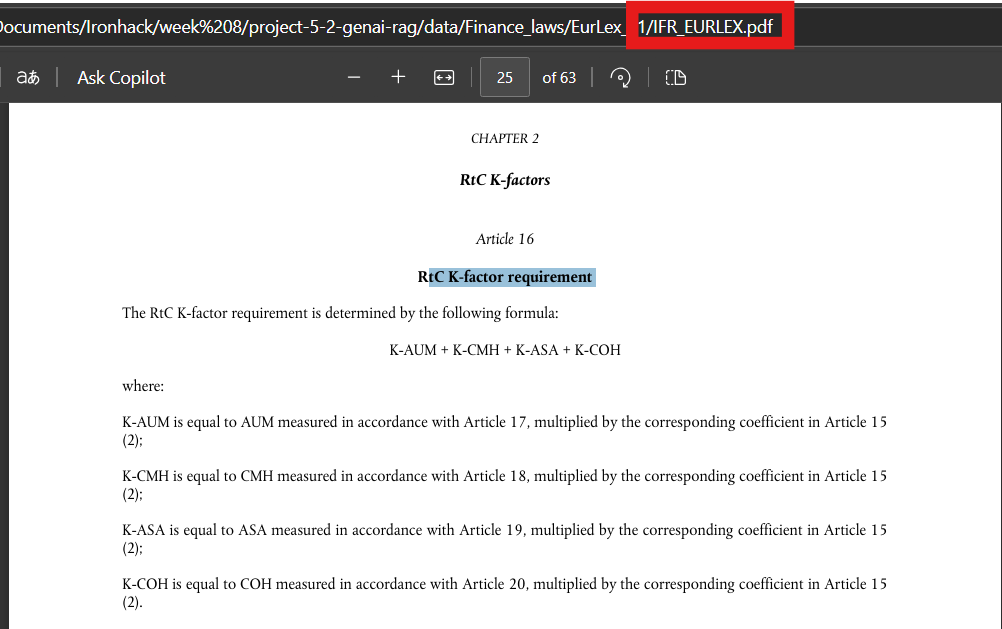

In [ ]:
question = "What are RtC K-factor requirements?"

hugging_response = get_response(question)
openai_response = get_response(question, openai=True)


In [69]:
display(Markdown("# Hugging Face Response"))
display(Markdown(hugging_response))

# Hugging Face Response

# RtC K-factor Requirements
The RtC K-factor requirements are determined by the formula: K-AUM + K-CMH + K-ASA + K-COH, where:
- K-AUM is equal to AUM (Assets Under Management) measured in accordance with Article 17, multiplied by the corresponding coefficient in Article 15(2).
- K-CMH is equal to CMH (Client Money Held) measured in accordance with Article 18, multiplied by the corresponding coefficient in Article 15(2).
- K-ASA is equal to ASA (Assets Under Management) measured in accordance with Article 19, multiplied by the corresponding coefficient in Article 15(2).
- K-COH is equal to COH (Cash Held) measured in accordance with Article 20, multiplied by the corresponding coefficient in Article 15(2) (source: IFR_EURLEX.pdf, page 36).

Source:
- From `IFR_EURLEX.pdf`, page 36 of the European Union Finance Laws, from the Official Journal of the European Union.

In [71]:
display(Markdown("# OpenAI Response"))
display(Markdown(openai_response))

# OpenAI Response

# RtC K-factor Requirements
The RtC K-factor requirements for investment firms are determined by the following formula:
- **K-RtC = K-A UM + K-CMH + K-ASA + K-COH**, 

where:
- **K-A UM** refers to the K-factor for assets under management (A UM), calculated based on the rolling average of total monthly assets under management over the last 15 months.
- **K-CMH** corresponds to client money held (CMH), calculated based on a specified methodology.
- **K-ASA** is for assets safeguarded and administered (ASA), also calculated in a prescribed manner.
- **K-COH** relates to client orders handled (COH), which is based on the rolling average of daily client orders over the last six months (excluding the three most recent months) (Article 16).

Additionally, investment firms must monitor their K-factors for trends that could lead to materially different own funds requirements and must notify their competent authority if such changes occur (source: Article 24).

Source:
- From `IFR_EURLEX.pdf, page 24` of the European Union Finance Laws, from the Official Journal of the European Union
- From `IFR_EURLEX.pdf, page 4` of the European Union Finance Laws, from the Official Journal of the European Union


---

## **Question 3**
- **Source** `data/Finance_laws/EurLex_v1/CRR_EURLEX.pdf`
- **Location**: Page 73

We took the following paragraph from the document

> Article 108 
>
> **Use of credit risk mitigation technique under the 
Standardised Approach and the IRB Approach**
> 1. For an exposure to which an institution applies the Stan
 dardised Approach under Chapter 2 or applies the IRB 
Approach under Chapter 3 but without using its own 
estimates of loss given default (LGD) and conversion factors 
under Article 151, the institution may use credit risk mitigation 
in accordance with Chapter 4 in the calculation of risk-weighted 
exposure amounts for the purposes of points (a) and (f) of 
Article 92(3) or, as relevant, expected loss amounts for the 
purposes of the calculation referred to in point (d) of 
Article 36(1) and point (c) of Article 62. 
> 2. For an exposure to which an institution applies the IRB 
Approach by using their own estimates of LGD and conversion 
factors under Article 151, the institution may use credit risk 
mitigation in accordance with Chapter 3. 

To make the question: ***What is the use of credit risk mitigation technique under the Standardised Approach and the IRB Approach?***

In [72]:
user_question = "What is the use of credit risk mitigation technique under the Standardised Approach and the IRB Approach?"

hugging_response = get_response(user_question)
openai_response = get_response(user_question, openai=True)

display(Markdown("# Hugging Face Response"))
display(Markdown(hugging_response))

display(Markdown("# OpenAI Response"))
display(Markdown(openai_response))

# Hugging Face Response

# Use of Credit Risk Mitigation Techniques

Credit risk mitigation techniques are utilized differently under the Standardised Approach and the Internal Ratings-Based (IRB) Approach.

1. **Standardised Approach**: Institutions applying the Standardised Approach can use credit risk mitigation techniques to calculate risk-weighted exposure amounts. Specifically, when an exposure is treated under this approach, the institution may incorporate credit risk mitigation in accordance with the relevant provisions, impacting both risk-weighted exposure amounts and expected loss amounts (Article 108(1)).

2. **IRB Approach**: For institutions using the IRB Approach, credit risk mitigation can also be applied. If an institution utilizes its own estimates of Loss Given Default (LGD) and conversion factors as permitted under Article 151, it can recognize credit risk mitigation strategies in accordance with the respective provisions set out in Chapter 3 (Article 108(2)).

Both approaches aim to effectively manage and reduce the capital requirements related to credit risk by allowing institutions to account for the protections provided by credit risk mitigation techniques (Article 144, CRR).

Source:
- From `CRR_EURLEX.pdf, page 72` of the European Union Finance Laws, from the Official Journal of the European Union
- From `CRR_EURLEX.pdf, page 93` of the European Union Finance Laws, from the Official Journal of the European Union

# OpenAI Response

# Use of Credit Risk Mitigation Techniques 

Credit risk mitigation techniques can be utilized under both the Standardised Approach and the Internal Ratings-Based (IRB) Approach to adjust the calculations of risk-weighted exposure amounts and expected loss amounts.

1. **Under the Standardised Approach**: Institutions may use credit risk mitigation when calculating risk-weighted exposure amounts and expected loss amounts, as provided in Article 108(1). They must ensure that they comply with specified provisions, including the treatment of different forms of collateral when covering a single exposure (Article 108(5)).

2. **Under the IRB Approach**: Institutions that use the IRB Approach, either employing their own estimates of loss given default (LGD) and conversion factors or not, may also apply credit risk mitigation techniques to their calculations, in accordance with the relevant provisions of Chapter 3 (Article 108(2)).

The key condition is that any credit exposure for which credit risk mitigation is applied should have a risk-weighted exposure amount that does not exceed that of an otherwise identical exposure without credit risk mitigation (Article 193(1)). Institutions must also undertake a full credit risk assessment of the underlying exposure, despite having credit risk mitigation in place (Article 108(9)).

Source:
- From `CRR_EURLEX.pdf`, page 72 of the European Union Finance Laws, from the Official Journal of the European Union
- From `CRR_EURLEX.pdf`, page 122 of the European Union Finance Laws, from the Official Journal of the European Union